In [1]:
import datetime
# The OS module in python provides functions for interacting with the operating system.
import os
# The shutil module in Python provides many functions of high-level operations on files and collections of files.
# This module helps in automating process of copying and removal of files and directories.
import shutil

# Here we'll import data processing libraries like Numpy, Pandas and Tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf

# Import pyplot package from matplotlib library
from matplotlib import pyplot as plt
# Import keras package from tensorflow library
from tensorflow import keras

# Import Sequential function from tensorflow.keras.models
from tensorflow.keras.models import Sequential
# Import Dense, DenseFeatures function from tensorflow.keras.layers
from tensorflow.keras.layers import Dense, DenseFeatures
# Import TensorBoard function from tensorflow.keras.callbacks
from tensorflow.keras.callbacks import TensorBoard

# Here we'll show the currently installed version of TensorFlow
print(tf.__version__)
%matplotlib inline

2.5.0


In [18]:
df = pd.read_csv('/content/Summary of Weather - Copy.csv')

In [22]:
len(df.columns)

23

In [20]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   WindGustSpd  532 non-null     float64
 1   MaxTemp      119040 non-null  float64
 2   MinTemp      119040 non-null  float64
 3   MeanTemp     119040 non-null  float64
 4   YR           119040 non-null  int64  
 5   MO           119040 non-null  int64  
 6   DA           119040 non-null  int64  
 7   DR           533 non-null     float64
 8   SPD          532 non-null     float64
 9   MAX          118566 non-null  float64
 10  MIN          118572 non-null  float64
 11  MEA          118542 non-null  float64
 12  SND          5563 non-null    float64
 13  FT           0 non-null       float64
 14  FB           0 non-null       float64
 15  FTI          0 non-null       float64
 16  ITH          0 non-null       float64
 17  PGT          525 non-null     float64
 18  SD3          0 non-null 

In [9]:
object_column_list = ['Date' , 'Precip' ,  'Snowfall' , 'PoorWeather', 'PRCP' ,  'SNF','TSHDSBRSGF']

In [24]:
# Defining the feature names into a list `CSV_COLUMNS`
CSV_COLUMNS = [
    'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'YR', 'MO', 'DA', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'
]
LABEL_COLUMN = 'MaxTemp'
# Defining the default values into a list `DEFAULTS`
DEFAULTS = [[0.0], [0.0], [0.0], [0.0], [0], [0], [0], [0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]]



def features_and_labels(row_data):
# The .pop() method will return item and drop from frame. 
    label = row_data.pop(LABEL_COLUMN)
    features = row_data
    
   
    return features, label


def create_dataset(pattern, batch_size=1, mode='eval'):
# The tf.data.experimental.make_csv_dataset() method reads CSV files into a dataset
    dataset = tf.data.experimental.make_csv_dataset(
        pattern, batch_size, CSV_COLUMNS, DEFAULTS)

# The map() function executes a specified function for each item in an iterable.
# The item is sent to the function as a parameter.
    dataset = dataset.map(features_and_labels)

    if mode == 'train':
# The shuffle() method takes a sequence (list, string, or tuple) and reorganize the order of the items.
        dataset = dataset.shuffle(buffer_size=1000).repeat()

    # take advantage of multi-threading; 1=AUTOTUNE
    dataset = dataset.prefetch(1)
    return dataset

In [25]:

# Defining the feature names into a list `INPUT_COLS`
INPUT_COLS = [
    'WindGustSpd', 'MinTemp',
       'MeanTemp', 'YR', 'MO', 'DA', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'
]

# Create input layer of feature columns
# TODO 1
feature_columns = {
    colname: tf.feature_column.numeric_column(colname)
    for colname in INPUT_COLS
    }

In [26]:
model = Sequential([
    DenseFeatures(feature_columns=feature_columns.values()),
    Dense(units=128, activation="relu", name="h1"),
    Dense(units=128, activation="relu", name="h2"),
    Dense(units=128, activation="relu", name="h3"),
    Dense(units=128, activation="relu", name="h4"),
    Dense(units=1, activation="linear", name="output")
    ])

In [27]:

# TODO 2b
# Create a custom evalution metric
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


# Compile the keras model
model.compile(optimizer="adam", loss="mse", metrics=[rmse, "mse"])

In [28]:
TRAIN_BATCH_SIZE = 1000
NUM_TRAIN_EXAMPLES = 10000 * 5  # training dataset will repeat, wrap around
NUM_EVALS = 50  # how many times to evaluate
NUM_EVAL_EXAMPLES = 10000  # enough to get a reasonable sample

trainds = create_dataset(
    pattern='../content/Summary of Weather - Copy*',
    batch_size=TRAIN_BATCH_SIZE,
    mode='train')

evalds = create_dataset(
    pattern='../content/Summary of Weather - Copy*',
    batch_size=1000,
    mode='eval').take(NUM_EVAL_EXAMPLES//1000)

In [29]:
trainds

<PrefetchDataset shapes: (OrderedDict([(WindGustSpd, (1000,)), (MinTemp, (1000,)), (MeanTemp, (1000,)), (YR, (1000,)), (MO, (1000,)), (DA, (1000,)), (DR, (1000,)), (SPD, (1000,)), (MAX, (1000,)), (MIN, (1000,)), (MEA, (1000,)), (SND, (1000,)), (FT, (1000,)), (FB, (1000,)), (FTI, (1000,)), (ITH, (1000,)), (PGT, (1000,)), (SD3, (1000,)), (RHX, (1000,)), (RHN, (1000,)), (RVG, (1000,)), (WTE, (1000,))]), (1000,)), types: (OrderedDict([(WindGustSpd, tf.float32), (MinTemp, tf.float32), (MeanTemp, tf.float32), (YR, tf.int32), (MO, tf.int32), (DA, tf.int32), (DR, tf.float32), (SPD, tf.float32), (MAX, tf.float32), (MIN, tf.float32), (MEA, tf.float32), (SND, tf.float32), (FT, tf.float32), (FB, tf.float32), (FTI, tf.float32), (ITH, tf.float32), (PGT, tf.float32), (SD3, tf.float32), (RHX, tf.float32), (RHN, tf.float32), (RVG, tf.float32), (WTE, tf.float32)]), tf.float32)>

In [30]:
evalds

<TakeDataset shapes: (OrderedDict([(WindGustSpd, (1000,)), (MinTemp, (1000,)), (MeanTemp, (1000,)), (YR, (1000,)), (MO, (1000,)), (DA, (1000,)), (DR, (1000,)), (SPD, (1000,)), (MAX, (1000,)), (MIN, (1000,)), (MEA, (1000,)), (SND, (1000,)), (FT, (1000,)), (FB, (1000,)), (FTI, (1000,)), (ITH, (1000,)), (PGT, (1000,)), (SD3, (1000,)), (RHX, (1000,)), (RHN, (1000,)), (RVG, (1000,)), (WTE, (1000,))]), (1000,)), types: (OrderedDict([(WindGustSpd, tf.float32), (MinTemp, tf.float32), (MeanTemp, tf.float32), (YR, tf.int32), (MO, tf.int32), (DA, tf.int32), (DR, tf.float32), (SPD, tf.float32), (MAX, tf.float32), (MIN, tf.float32), (MEA, tf.float32), (SND, tf.float32), (FT, tf.float32), (FB, tf.float32), (FTI, tf.float32), (ITH, tf.float32), (PGT, tf.float32), (SD3, tf.float32), (RHX, tf.float32), (RHN, tf.float32), (RVG, tf.float32), (WTE, tf.float32)]), tf.float32)>

In [31]:
%time 
# TODO 3
steps_per_epoch = NUM_TRAIN_EXAMPLES // (TRAIN_BATCH_SIZE * NUM_EVALS)

LOGDIR = "./taxi_trained"
# Train the sequential model
history = model.fit(x=trainds,
                    steps_per_epoch=steps_per_epoch,
                    epochs=NUM_EVALS,
                    validation_data=evalds,
                    callbacks=[TensorBoard(LOGDIR)])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1/1 [==============================] - ETA: 0s - loss: 671.5329 - rmse: 25.9140 - mse: 671.5329WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'collections.OrderedDict'> input: OrderedDict([('WindGustSpd', <tf.Tensor 'ExpandDims_20:0' shape=(1000, 1) dtype=float32>), ('MinTemp', <tf.Tensor 'ExpandDims_11:0' shape=(1000, 1) dtype=float32>), ('MeanTemp', <tf.Tensor 'ExpandDims_10:0' shape=(1000, 1) dtype=float32>), ('YR', <tf.Tensor 'ExpandDims_21:0' shape=(1000, 1) dtype=int32>), ('MO', <tf.Tensor 'ExpandDims_9:0' shape=(1000, 1) dtype=int32>), ('DA', <tf.Tensor 'ExpandDims:0' shape=(1000, 1) dtype=int32>), ('DR', <tf.Tensor 'ExpandDims_1:0' shape=(1000, 1) dtype=float32>), ('SPD', <tf.Tensor 'ExpandDims_18:0' shape=(1000, 1) dtype=float32>),

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features (DenseFeature multiple                  0         
_________________________________________________________________
h1 (Dense)                   multiple                  2944      
_________________________________________________________________
h2 (Dense)                   multiple                  16512     
_________________________________________________________________
h3 (Dense)                   multiple                  16512     
_________________________________________________________________
h4 (Dense)                   multiple                  16512     
_________________________________________________________________
output (Dense)               multiple                  129       
Total params: 52,609
Trainable params: 52,609
Non-trainable params: 0
____________________________________________________

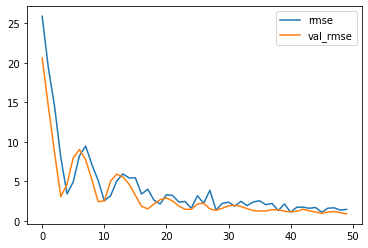

In [34]:

RMSE_COLS = ['rmse', 'val_rmse']

# The history object is returned from calls to the fit() function used to train the model.
# Metrics are stored in a dictionary in the history member of the object returned.
pd.DataFrame(history.history)[RMSE_COLS].plot()

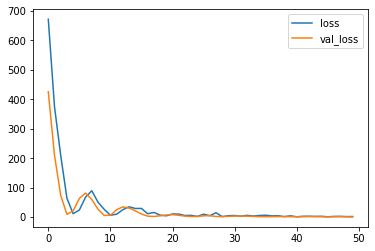

In [35]:
LOSS_COLS = ['loss', 'val_loss']

# The history object is returned from calls to the fit() function used to train the model.
# Metrics are stored in a dictionary in the history member of the object returned.
pd.DataFrame(history.history)[LOSS_COLS].plot()